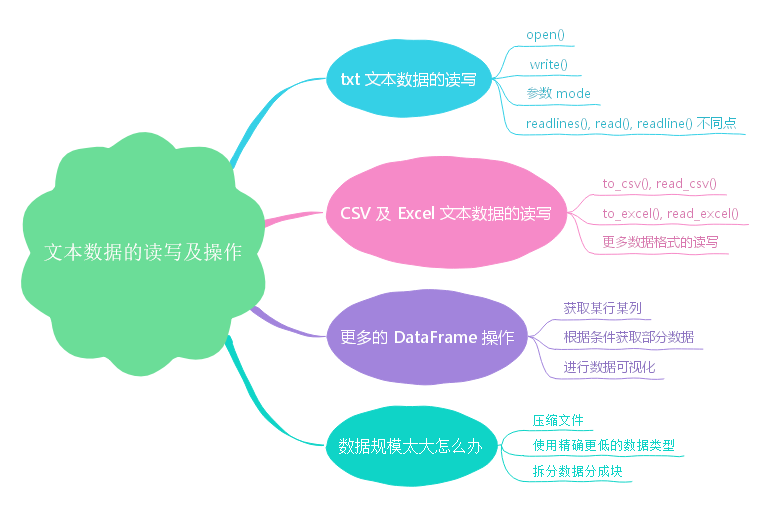

# txt 文本数据的读写

对于 txt 文本数据，Python 中的内置函数 open() 和 write() 就可以实现读取或者写入操作。

open() 函数用于打开一个文件，创建一个 file 对象，之后，相关的方法才可以调用它进行更多的操作。 对于 open() 函数，我们主要关注三个传入的参数：

- file: 文件路径（相对或者绝对路径）。
- mode: 文件打开模式。
- encoding: 编码格式，一般使用 utf-8。   

其中，mode 决定了打开文件的模式，也就是限定了可以对文件做什么样的操作，比如只读，写入，追加等，这个参数是非强制的，默认文件访问模式为只读 (r)，以下是常用的模式：

- r : 读取文件，若文件不存在则会报错。
- w: 写入文件，若文件不存在则会先创建再写入，若存在则会覆盖原文件。
- a : 写入文件，若文件不存在则会先创建再写入，若存在不会覆盖原文件，而是在文件中继续写入内容。
- rb, wb：分别与 r, w 类似，但用于读写二进制文件。
- r+ : 可读、可写，若文件不存在会报错，在写操作时会覆盖原文件。
- w+ : 可读，可写，文件不存在先创建，若存在会覆盖。
- a+ ：可读、可写，文件不存在先创建，若不存在不会覆盖，在文件中继续写入内容。

注：utf-8（8 位元，Universal Character Set/Unicode Transformation Format）是针对 Unicode 的一种可变长度字符编码。它可以用来表示 Unicode 标准中的任何字符，而且其编码中的第一个字节仍与 ASCII 相容，使得原来处理 ASCII 字符的软件无须或只进行少部份修改后，便可继续使用。因此，它逐渐成为电子邮件、网页及其他存储或传送文字的应用中，优先采用的编码。

In [50]:
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3205/poem.txt"
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3205/idiom.txt"

File 'poem.txt' already there; not retrieving.

File 'idiom.txt' already there; not retrieving.



In [51]:
f = open('idiom.txt',encoding='utf-8')
poem = f.readline()
print(type(poem),poem)


<class 'str'> 路遥知马力，日久见人心



- read()：读取整个文件，将文件内容放到一个 str 类型的变量中，但是，如果文件非常大，尤其是大于内存时，无法使用 read() 方法。
- readline()：每次只读取文件的一行，即读取到的一行内容放到一个字符串变量中，返回 str 类型。可以在文件过大，内存不够时使用。

In [52]:
f = open("poem.txt","r", encoding="utf-8")
poem = f.read()
print(type(poem), poem)  # 返回的是一个包含所有内容的 str 类型的变量

<class 'str'> 帷飘白玉堂，簟卷碧牙床。
楚女当时意，萧萧发彩凉。


In [53]:
f = open('poem.txt',encoding='utf-8')
while True:
    poem_line = f.readline()
    if poem_line:
        print(poem_line)
    else:
        break

帷飘白玉堂，簟卷碧牙床。

楚女当时意，萧萧发彩凉。


以上利用 open() 函数实现了 txt 文件的读取，接下来，我们希望应用 write() 函数，实现写入一个 txt 文件。

In [54]:
idiom = ["路遥知马力，日久见人心","千学不如一看，千看不如一练。", "岁寒知松柏，患难见交情。"]
f = open('idiom.txt','w',encoding='utf-8')
for text in idiom:
    f.write(text)
    f.write('\n')

有时候，我们希望在一个已存在的 txt 文件中，继续写入东西，这时候 mode 要选择“a”，如果选择“w”，新写入的内容会覆盖原来的内容

In [55]:
f = open('idiom.txt','a',encoding = 'utf-8')
f.write("好好学习，天天向上"+'\n')

10

# CSV 及 Excel 文本数据的读写

对于 CSV 类型的文件，可调用 Pandas 中的 to_csv() 以及 read_csv() 函数，轻松实现写入或者读取

In [56]:
import pandas as pd
# 这是我们的数据
data = {
    'CHN': {'COUNTRY': 'China', 'POP': 1_398.72, 'AREA': 9_596.96,
            'GDP': 12_234.78, 'CONT': 'Asia'},
    'IND': {'COUNTRY': 'India', 'POP': 1_351.16, 'AREA': 3_287.26,
            'GDP': 2_575.67, 'CONT': 'Asia', 'IND_DAY': '1947-08-15'},
    'USA': {'COUNTRY': 'US', 'POP': 329.74, 'AREA': 9_833.52,
            'GDP': 19_485.39, 'CONT': 'N.America',
            'IND_DAY': '1776-07-04'},
    'IDN': {'COUNTRY': 'Indonesia', 'POP': 268.07, 'AREA': 1_910.93,
            'GDP': 1_015.54, 'CONT': 'Asia', 'IND_DAY': '1945-08-17'},
    'BRA': {'COUNTRY': 'Brazil', 'POP': 210.32, 'AREA': 8_515.77,
            'GDP': 2_055.51, 'CONT': 'S.America', 'IND_DAY': '1822-09-07'},
    'PAK': {'COUNTRY': 'Pakistan', 'POP': 205.71, 'AREA': 881.91,
            'GDP': 302.14, 'CONT': 'Asia', 'IND_DAY': '1947-08-14'},
    'NGA': {'COUNTRY': 'Nigeria', 'POP': 200.96, 'AREA': 923.77,
            'GDP': 375.77, 'CONT': 'Africa', 'IND_DAY': '1960-10-01'},
    'BGD': {'COUNTRY': 'Bangladesh', 'POP': 167.09, 'AREA': 147.57,
            'GDP': 245.63, 'CONT': 'Asia', 'IND_DAY': '1971-03-26'},
    'RUS': {'COUNTRY': 'Russia', 'POP': 146.79, 'AREA': 17_098.25,
            'GDP': 1_530.75, 'IND_DAY': '1992-06-12'},
    'MEX': {'COUNTRY': 'Mexico', 'POP': 126.58, 'AREA': 1_964.38,
            'GDP': 1_158.23, 'CONT': 'N.America', 'IND_DAY': '1810-09-16'},
    'JPN': {'COUNTRY': 'Japan', 'POP': 126.22, 'AREA': 377.97,
            'GDP': 4_872.42, 'CONT': 'Asia'},
    'DEU': {'COUNTRY': 'Germany', 'POP': 83.02, 'AREA': 357.11,
            'GDP': 3_693.20, 'CONT': 'Europe'},
    'FRA': {'COUNTRY': 'France', 'POP': 67.02, 'AREA': 640.68,
            'GDP': 2_582.49, 'CONT': 'Europe', 'IND_DAY': '1789-07-14'},
    'GBR': {'COUNTRY': 'UK', 'POP': 66.44, 'AREA': 242.50,
            'GDP': 2_631.23, 'CONT': 'Europe'},
    'ITA': {'COUNTRY': 'Italy', 'POP': 60.36, 'AREA': 301.34,
            'GDP': 1_943.84, 'CONT': 'Europe'},
    'ARG': {'COUNTRY': 'Argentina', 'POP': 44.94, 'AREA': 2_780.40,
            'GDP': 637.49, 'CONT': 'S.America', 'IND_DAY': '1816-07-09'},
    'DZA': {'COUNTRY': 'Algeria', 'POP': 43.38, 'AREA': 2_381.74,
            'GDP': 167.56, 'CONT': 'Africa', 'IND_DAY': '1962-07-05'},
    'CAN': {'COUNTRY': 'Canada', 'POP': 37.59, 'AREA': 9_984.67,
            'GDP': 1_647.12, 'CONT': 'N.America', 'IND_DAY': '1867-07-01'},
    'AUS': {'COUNTRY': 'Australia', 'POP': 25.47, 'AREA': 7_692.02,
            'GDP': 1_408.68, 'CONT': 'Oceania'},
    'KAZ': {'COUNTRY': 'Kazakhstan', 'POP': 18.53, 'AREA': 2_724.90,
            'GDP': 159.41, 'CONT': 'Asia', 'IND_DAY': '1991-12-16'}
}

columns = ('COUNTRY', 'POP', 'AREA', 'GDP', 'CONT', 'IND_DAY')
# 需要应用 DataFrame 构造函数将 data 创建一个 DataFrame 对象，才能写入文件
df = pd.DataFrame(data=data)

In [57]:
df

,CHN,IND,USA,IDN,BRA,PAK,NGA,BGD,RUS,MEX,JPN,DEU,FRA,GBR,ITA,ARG,DZA,CAN,AUS,KAZ
COUNTRY,China,India,US,Indonesia,Brazil,Pakistan,Nigeria,Bangladesh,Russia,Mexico,Japan,Germany,France,UK,Italy,Argentina,Algeria,Canada,Australia,Kazakhstan
POP,1398.72,1351.16,329.74,268.07,210.32,205.71,200.96,167.09,146.79,126.58,126.22,83.02,67.02,66.44,60.36,44.94,43.38,37.59,25.47,18.53
AREA,9596.96,3287.26,9833.52,1910.93,8515.77,881.91,923.77,147.57,17098.25,1964.38,377.97,357.11,640.68,242.5,301.34,2780.4,2381.74,9984.67,7692.02,2724.9
GDP,12234.78,2575.67,19485.39,1015.54,2055.51,302.14,375.77,245.63,1530.75,1158.23,4872.42,3693.2,2582.49,2631.23,1943.84,637.49,167.56,1647.12,1408.68,159.41
CONT,Asia,Asia,N.America,Asia,S.America,Asia,Africa,Asia,NaN,N.America,Asia,Europe,Europe,Europe,Europe,S.America,Africa,N.America,Oceania,Asia
IND_DAY,NaN,1947-08-15,1776-07-04,1945-08-17,1822-09-07,1947-08-14,1960-10-01,1971-03-26,1992-06-12,1810-09-16,NaN,NaN,1789-07-14,NaN,NaN,1816-07-09,1962-07-05,1867-07-01,NaN,1991-12-16


In [58]:
# 将数据进行转置
df = df.T
df

,COUNTRY,POP,AREA,GDP,CONT,IND_DAY
CHN,China,1398.72,9596.96,12234.78,Asia,NaN
IND,India,1351.16,3287.26,2575.67,Asia,1947-08-15
USA,US,329.74,9833.52,19485.39,N.America,1776-07-04
IDN,Indonesia,268.07,1910.93,1015.54,Asia,1945-08-17
BRA,Brazil,210.32,8515.77,2055.51,S.America,1822-09-07
PAK,Pakistan,205.71,881.91,302.14,Asia,1947-08-14
NGA,Nigeria,200.96,923.77,375.77,Africa,1960-10-01
BGD,Bangladesh,167.09,147.57,245.63,Asia,1971-03-26
RUS,Russia,146.79,17098.25,1530.75,NaN,1992-06-12
MEX,Mexico,126.58,1964.38,1158.23,N.America,1810-09-16


In [59]:
# to_csv 写入一个文件
df.to_csv('20_country.csv',encoding="utf8")

# 读取文件，应用 read_csv() 则可以读取刚刚生成的 CSV 文件。
df = pd.read_csv('20_country.csv',index_col = 0)
df

,COUNTRY,POP,AREA,GDP,CONT,IND_DAY
CHN,China,1398.72,9596.96,12234.78,Asia,NaN
IND,India,1351.16,3287.26,2575.67,Asia,1947-08-15
USA,US,329.74,9833.52,19485.39,N.America,1776-07-04
IDN,Indonesia,268.07,1910.93,1015.54,Asia,1945-08-17
BRA,Brazil,210.32,8515.77,2055.51,S.America,1822-09-07
PAK,Pakistan,205.71,881.91,302.14,Asia,1947-08-14
NGA,Nigeria,200.96,923.77,375.77,Africa,1960-10-01
BGD,Bangladesh,167.09,147.57,245.63,Asia,1971-03-26
RUS,Russia,146.79,17098.25,1530.75,NaN,1992-06-12
MEX,Mexico,126.58,1964.38,1158.23,N.America,1810-09-16


对于 Excel 文件，如法炮制，调用 Pandas 中的 to_excel() 以及 read_excel() 函数，轻松实现写入或者读取。如果我们操作的对象是以 .xlsx 为后缀的 Excel 文件，还需要安装库 openpyxl，线上环境已经预装了 openpyxl。

通过以上的例子，相信大家都已经发现，如果想将 DataFrame 对象写入某一格式的文件，应用 Pandas 库中 to_<file-type>() 形式的函数就可以了，比如上述的 to_csv() 和 to_excel()，当然，还包括更多其它的文件形式：

- to_json()
- to_html()
- to_sql()
- to_pickle()

对于不同类型文件的读取，同理可得：

- read_json()
- read_html()
- read_sql()
- read_pickle()

# 更多的 DataFrame 操作


很多时候，我们完成了文件中的数据读取，转换为 DataFrame 形式之后，需要进行一系列的数据处理操作，比如获取某行某列，根据条件获取部分数据，进行数据可视化等等。接下来的部分将为大家介绍一些常见的基于 DataFrame 的操作。


In [66]:
# 使用 loc[] 可以获取具有指定行和列名称的数据。

df.loc['CHN','POP']

1398.72

In [67]:
# 直接根据列名来获取某列。
df["POP"]

CHN    1398.72
IND    1351.16
USA     329.74
IDN     268.07
BRA     210.32
PAK     205.71
NGA     200.96
BGD     167.09
RUS     146.79
MEX     126.58
JPN     126.22
DEU      83.02
FRA      67.02
GBR      66.44
ITA      60.36
ARG      44.94
DZA      43.38
CAN      37.59
AUS      25.47
KAZ      18.53
Name: POP, dtype: float64

In [70]:
# 也可以根据列名来获取多列。
df[["POP","GDP"]] # 注意是列表的形式


,POP,GDP
CHN,1398.72,12234.78
IND,1351.16,2575.67
USA,329.74,19485.39
IDN,268.07,1015.54
BRA,210.32,2055.51
PAK,205.71,302.14
NGA,200.96,375.77
BGD,167.09,245.63
RUS,146.79,1530.75
MEX,126.58,1158.23


In [ ]:
# 根据 iloc[] 获取某一行。
df.iloc[[1],] # 和df.iloc[[1]]结果相同


,COUNTRY,POP,AREA,GDP,CONT,IND_DAY
IND,India,1351.16,3287.26,2575.67,Asia,1947-08-15


In [74]:
# 获取某几行
df.iloc[[1,4],]

,COUNTRY,POP,AREA,GDP,CONT,IND_DAY
IND,India,1351.16,3287.26,2575.67,Asia,1947-08-15
BRA,Brazil,210.32,8515.77,2055.51,S.America,1822-09-07


In [75]:
# 获取某几行，某几列
df.iloc[[1,2],[1,2,3]]

,POP,AREA,GDP
IND,1351.16,3287.26,2575.67
USA,329.74,9833.52,19485.39


In [79]:
# 根据条件获取数据，如获取亚洲国家对应的数据。
df.loc[df['CONT']=="Asia"] # 注意这里不再是iloc了


,COUNTRY,POP,AREA,GDP,CONT,IND_DAY
CHN,China,1398.72,9596.96,12234.78,Asia,NaN
IND,India,1351.16,3287.26,2575.67,Asia,1947-08-15
IDN,Indonesia,268.07,1910.93,1015.54,Asia,1945-08-17
PAK,Pakistan,205.71,881.91,302.14,Asia,1947-08-14
BGD,Bangladesh,167.09,147.57,245.63,Asia,1971-03-26
JPN,Japan,126.22,377.97,4872.42,Asia,NaN
KAZ,Kazakhstan,18.53,2724.90,159.41,Asia,1991-12-16


In [84]:
# 若需要满足多个条件，用 & 连接即可。
df.loc[(df['CONT']=='Asia') & (df["GDP"]>1000)]  # 注意这里用and不可以

,COUNTRY,POP,AREA,GDP,CONT,IND_DAY
CHN,China,1398.72,9596.96,12234.78,Asia,NaN
IND,India,1351.16,3287.26,2575.67,Asia,1947-08-15
IDN,Indonesia,268.07,1910.93,1015.54,Asia,1945-08-17
JPN,Japan,126.22,377.97,4872.42,Asia,NaN


<Axes: >

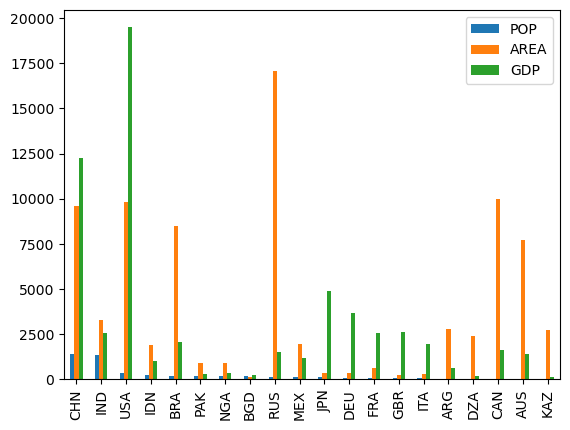

In [85]:
# 直接应用 DataFrame 中的 plot() 函数可以对数值类型的列进行画图。
df.plot.bar()


<Axes: >

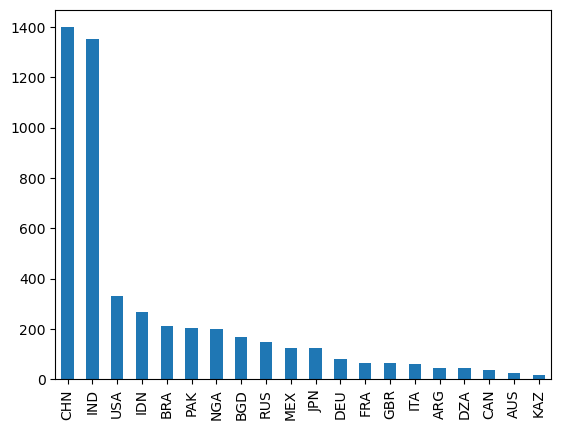

In [86]:
# 也可以只选取其中的某部分感兴趣的数据进行画图。
df["POP"].plot.bar()  # 各国家的人口对比

# 数据规模太大怎么办

有时候在数据预处理过程中，我们会遇到大型文件，比如某部长篇小说都存放在一个 txt 文件中，如果文件太大，无法直接保存或处理，则可以采用以下几种方法来减少所需的磁盘空间：

- 压缩文件。
- 使用精确更低的数据类型。
- 拆分数据分成块

压缩文件：在保存文件时，添加一个与所需压缩类型相对应的后缀，比如：   
- '.gz'
- '.bz2'
- '.zip'
- '.xz'

In [87]:
# 压缩为以 ".zip" 为后缀的文件。
df.to_csv("20_country.csv.zip")

使用精确更低的数据类型：在可以接受不太精确的数据类型的情况下，转换数据类型可以节省大量内存。

In [89]:
df = pd.read_csv("20_country.csv", index_col=0)
df.dtypes

COUNTRY     object
POP        float64
AREA       float64
GDP        float64
CONT        object
IND_DAY     object
dtype: object

具有浮点数的列是 64 位浮点数。此类型的每个数字 float64 消耗 64 位或 8 个字节。每列有 20 个数字，需要 160 个字节。

In [90]:
df.memory_usage()

Index      160
COUNTRY    160
POP        160
AREA       160
GDP        160
CONT       160
IND_DAY    160
dtype: int64

In [92]:
# 通过将将 float64 浮点数存为 float32 浮点数，以节省内存。
dtypes = {'POP': 'float32', 'AREA': 'float32', 'GDP': 'float32'}
df = pd.read_csv("20_country.csv", index_col=0, dtype=dtypes)
df.dtypes

COUNTRY     object
POP        float32
AREA       float32
GDP        float32
CONT        object
IND_DAY     object
dtype: object

In [93]:
df.memory_usage()

Index      160
COUNTRY    160
POP         80
AREA        80
GDP         80
CONT       160
IND_DAY    160
dtype: int64

拆分数据分成块：处理超大型数据集的另一种方法是将数据分成较小的块，然后一次处理一个块，参数 chunksize，默认为 None，可以传入一个整数值指明块的数量。

In [94]:
data_chunk = pd.read_csv('20_country.csv',index_col=0,chunksize=8)
print(type(data_chunk))
print(hasattr(data_chunk,'__tier__'))
print(hasattr(data_chunk,'__next__'))

<class 'pandas.io.parsers.readers.TextFileReader'>
False
True


hasattr() 是 Python 的一个内置函数，用于检查一个对象是否具有某个属性或方法。它的核心作用是动态判断对象是否包含指定名称的成员（属性或方法），避免直接访问时因属性不存在而抛出 AttributeError 错误。

当 chunksize 为整数时，read_csv() 返回一个可迭代的变量，可以在 for 循环中使用该可迭代的变量，以在每次迭代中仅获取和处理数据集的一部分，这样就能够控制处理一次数据所需的内存量，并将其保持在合理的程度。

In [95]:
for df_chunk in pd.read_csv('20_country.csv',index_col=0,chunksize=8):
    print(df_chunk,end = '\n\n')
    print('memory:', df_chunk.memory_usage().sum(),
          'bytes', end='\n\n\n')  # 查看所占内存

        COUNTRY      POP     AREA       GDP       CONT     IND_DAY
CHN       China  1398.72  9596.96  12234.78       Asia         NaN
IND       India  1351.16  3287.26   2575.67       Asia  1947-08-15
USA          US   329.74  9833.52  19485.39  N.America  1776-07-04
IDN   Indonesia   268.07  1910.93   1015.54       Asia  1945-08-17
BRA      Brazil   210.32  8515.77   2055.51  S.America  1822-09-07
PAK    Pakistan   205.71   881.91    302.14       Asia  1947-08-14
NGA     Nigeria   200.96   923.77    375.77     Africa  1960-10-01
BGD  Bangladesh   167.09   147.57    245.63       Asia  1971-03-26

memory: 448 bytes


       COUNTRY     POP      AREA      GDP       CONT     IND_DAY
RUS     Russia  146.79  17098.25  1530.75        NaN  1992-06-12
MEX     Mexico  126.58   1964.38  1158.23  N.America  1810-09-16
JPN      Japan  126.22    377.97  4872.42       Asia         NaN
DEU    Germany   83.02    357.11  3693.20     Europe         NaN
FRA     France   67.02    640.68  2582.49     Europ

在上述例子中，chunksize 是 8，因此 for 循环的第一次迭代仅返回 DataFrame 数据集的前 8 行，第二次迭代将返回接下来的 8 行，第三次也是最后一次迭代将返回其余 4 行。在每次迭代中，获得 DataFrame 行数等于 chunksize。当前，在最后一次迭代中，行数可能少于 chunksize，因为 DataFrame 的总行数不一定能够被 chunksize 整除。